## Relation between depressive disorder and nutrition
Questions to be answered:

* What is the profile of people over 18 with depressive symptoms between the years of 2005 and 2006?

* Healthy nutrition and exercise are associated with lower indices of depression in this population?

## Data dictionary


#### **Database 1**:

* SEQN: unique identifier;

In the last 2 weeks how often were you bothered by any of these:

* DPQ010: No interest or joy in doing things;

* DPQ020: Felt sad, depressive or without perspective;

* DPQ030: Dificult to fall asleep, stay asleep or slept more than usual;

* DPQ040: Felt tired or with low energy;

* DPQ050: Lack of appetite or ate too much;

* DPQ060: Felt bad about yourself, felt like a failure or felt that disappointed family or yourself;

* DPQ070: Difficulty to concentrate;

* DPQ080: Slowness in movement or speaking (noticeable by other people) or the opposite, was too agitated;

* DPQ090: Had thoughts about hurting yourself or though it would be better to be dead;

The answer could be:

* 0: None;

* 1: Less than once a week;

* 2: Once a week or more;

* 3: Almost everyday;

* 7: Refused to answer;

* 9: Does not know.

Others:

* RIAGENDR: Gender
  * 1: Male
  * 2: Female

* RIDAGEYR: Age in years (open field)

* DMDEDUC: Race/Ethnicity
  * 1: white non-Hispanic
  * 2: black non-Hispanic
  * 3: Mexican-American
  * 4: Other
  * 5: Other - Hispanic


* DMDEDUC: Education
  * 1: Less than 9th year
  * 2: 9th-12nd year
  * 3: Gigh school
  * 4: Unfinished graduation
  * 5: Graduation or more
  * 7: Refused to answer
  * 9: Does not know

* INDFMINC: Yearly family income (US$)
  * 1: 0-4999
  * 2: 5000-9999
  * 3: 10000-14999
  * 4: 15000-19999
  * 5: 20000-24999
  * 6: 25000-34999
  * 7: 35000-44999
  * 8: 45000-54999
  * 9: 55000-64999
  * 10: 65000-74999 
  * 11: Equal or above 75000
  * 12: Over 20000
  * 13: Less than 20000
  * 77: Refused to answer
  * 99: Does not know


#### **Database 2**:

* SEQN: unique identifier;

* PAG_MINW: Total weekly time of moderate-vigorous aerobic activity in minutes by the Physical Activity Guideline (PAG)

* ADHERENCE: Physical Activity Guideline (PAG) Group
  * 1: Low (< 150 min per week)
  * 2: Adequate ( 150-300 min per week)
  * 3: Above ( > 300 min per week)

* HEI2015C1_TOTALVEG: Healthy Eating Index - Vegetables (0-5)

* HEI2015C2_GREEN_AND_BEAN: Healthy Eating Index - Greens and Beans (0-5)

* HEI2015C3_TOTALFRUIT: Healthy Eating Index - Fruits (0-5)

* HEI2015C4_WHOLEFRUIT: Healthy Eating Index - Fruits in natura (0-5)

* HEI2015C5_WHOLEGRAIN: Healthy Eating Index - whole grains (0-10)

* HEI2015C6_TOTALDAIRY:Healthy Eating Index - dairy (0-10)

* HEI2015C7_TOTPROT: Healthy Eating Index - Protein (0-5)

* HEI2015C8_SEAPLANT_PROT: Healthy Eating Index - Seaplants and vegetable protein (0-5)

* HEI2015C9_FATTYACID: Healthy Eating Index - Fatty acid (0-10)

* HEI2015C10_SODIUM: Healthy Eating Index - Sodium (0-10)

* HEI2015C11_REFINEDGRAIN: Healthy Eating Index - Refined grains (0-10)

* HEI2015C12_SFAT: Healthy Eating Index - Saturated fat(0-10)

* HEI2015C13_ADDSUG: Healthy Eating Index - Added sugar (0-10)

* HEI2015_TOTAL_SCORE: Healthy Eating Index - Total Score (0-100)

## Libs

In [1]:
!pip install pingouin -q

     |████████████████████████████████| 185 kB 18.8 MB/s 
     |████████████████████████████████| 9.9 MB 70.7 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as stats
import pingouin as pg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Data

In [4]:
df_mental_health=pd.read_csv('/content/drive/MyDrive/Julia/Cursos/Estatística Teste de Hipóteses - Renata/Projeto Final/Projeto 1 - NHNES-20221126T141716Z-001/Projeto 1 - NHNES/DEMO_PHQ.csv')

In [5]:
df_nutrition=pd.read_csv('/content/drive/MyDrive/Julia/Cursos/Estatística Teste de Hipóteses - Renata/Projeto Final/Projeto 1 - NHNES-20221126T141716Z-001/Projeto 1 - NHNES/PAG_HEI.csv')

## Data Manipulation

In [6]:
df_nutrition.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [7]:
df_nutrition.isna().sum()

SEQN                           0
PAG_MINW                    2274
ADHERENCE                   2274
HEI2015C1_TOTALVEG           875
HEI2015C2_GREEN_AND_BEAN     875
HEI2015C3_TOTALFRUIT         875
HEI2015C4_WHOLEFRUIT         875
HEI2015C5_WHOLEGRAIN         875
HEI2015C6_TOTALDAIRY         875
HEI2015C7_TOTPROT            875
HEI2015C8_SEAPLANT_PROT      875
HEI2015C9_FATTYACID          875
HEI2015C10_SODIUM            875
HEI2015C11_REFINEDGRAIN      875
HEI2015C12_SFAT              875
HEI2015C13_ADDSUG            875
HEI2015_TOTAL_SCORE          875
dtype: int64

In [8]:
df_mental_health.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


Here we need to create a score for the PHQ questionnaire. I chose to sum the answers to the questions, but before I transformed the 7 (when a person refuses to answar) and 9 (when a person does not know) into 0, otherwise it would dramatically interfer in the final score. 

In [9]:
columns_score=['SEQN','DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090']

In [10]:
score=df_mental_health[columns_score]

In [11]:
score.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0


In [12]:
for _ in columns_score:
  score.loc[score[_] == 7, _] = 0 
  score.loc[score[_] == 9, _] = 0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
score['DPQ020'].max()

3.0

In [14]:
columns_sum=['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090']

In [15]:
df_mental_health['score_PHQ']=score[columns_sum].sum(axis=1)

In [16]:
df_mental_health.isna().sum()

SEQN           0
DPQ010       498
DPQ020       498
DPQ030       498
DPQ040       498
DPQ050       498
DPQ060       498
DPQ070       498
DPQ080       498
DPQ090       498
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDEDUC        0
INDFMINC      47
score_PHQ      0
dtype: int64

In [17]:
df_grouped=(df_mental_health
 .merge(df_nutrition, on='SEQN')
 .dropna())

In [18]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4702 entries, 1 to 5333
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      4702 non-null   int64  
 1   DPQ010                    4702 non-null   float64
 2   DPQ020                    4702 non-null   float64
 3   DPQ030                    4702 non-null   float64
 4   DPQ040                    4702 non-null   float64
 5   DPQ050                    4702 non-null   float64
 6   DPQ060                    4702 non-null   float64
 7   DPQ070                    4702 non-null   float64
 8   DPQ080                    4702 non-null   float64
 9   DPQ090                    4702 non-null   float64
 10  RIAGENDR                  4702 non-null   int64  
 11  RIDAGEYR                  4702 non-null   int64  
 12  RIDRETH1                  4702 non-null   int64  
 13  DMDEDUC                   4702 non-null   int64  
 14  INDFMINC

In [19]:
df_grouped.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'score_PHQ', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

In [20]:
df_grouped[['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090','RIAGENDR','RIDRETH1','ADHERENCE','DMDEDUC', 'INDFMINC']]= df_grouped[['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090','RIAGENDR','RIDRETH1','ADHERENCE','DMDEDUC', 'INDFMINC']].astype(str) #transforming categorical columns into str

In [21]:
df_grouped.describe(include=[np.number])

,RIDAGEYR,score_PHQ,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000
mean,44.918120,2.734368,484.944251,3.203299,1.796285,2.484149,2.362777,1.773426,3.768252,4.435628,2.584976,4.706274,4.747774,5.834979,6.031921,6.200332,49.930071
std,19.849216,3.744193,796.184712,1.460505,2.134643,1.948502,2.170044,1.912937,1.592593,1.003214,2.169071,3.232514,3.410600,3.480751,3.184671,3.338046,12.345400
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212
25%,27.000000,0.000000,41.570439,2.065919,0.000000,0.443118,0.000000,0.000000,2.616103,4.170768,0.000000,2.008011,1.584721,2.998627,3.648405,3.714255,40.930960
50%,43.000000,1.000000,221.709007,3.215847,0.055475,2.312028,2.081049,1.039807,4.940275,5.000000,2.558190,4.443381,4.820562,6.256305,6.368482,6.850292,49.457583
75%,61.000000,4.000000,581.986143,4.803385,4.435094,4.908845,5.000000,3.409052,5.000000,5.000000,5.000000,7.262051,7.630856,9.297182,8.958154,9.402538,58.060844
max,85.000000,27.000000,10777.829099,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383


## Univariate Exploratory Analysis (EDA)

**Qualitative variables**: DPQ010, DPQ020, DPQ030, DPQ040, DPQ050, DPQ060,DPQ070, DPQ080, DPQ090,RIAGENDR,RIDRETH1,ADHERENCE, DMDEDUC, INDFMINC.

**Quantitative variables**: score_PHQ, PAG_MINW, HEI2015C1_TOTALVEG, HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT, HEI2015C4_WHOLEFRUIT, HEI2015C5_WHOLEGRAIN, HEI2015C6_TOTALDAIRY, HEI2015C7_TOTPROT, HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID, HEI2015C10_SODIUM, HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT, HEI2015C13_ADDSUG, HEI2015_TOTAL_SCORE.

#### **Quantitative variables**

In [22]:
quantitative_variables=['score_PHQ', 'PAG_MINW', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN','HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 
                        'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT','HEI2015C9_FATTYACID', 
                        'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN','HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']

In [23]:
len(quantitative_variables)

16

In [24]:
quantitative_variables

['score_PHQ',
 'PAG_MINW',
 'HEI2015C1_TOTALVEG',
 'HEI2015C2_GREEN_AND_BEAN',
 'HEI2015C3_TOTALFRUIT',
 'HEI2015C4_WHOLEFRUIT',
 'HEI2015C5_WHOLEGRAIN',
 'HEI2015C6_TOTALDAIRY',
 'HEI2015C7_TOTPROT',
 'HEI2015C8_SEAPLANT_PROT',
 'HEI2015C9_FATTYACID',
 'HEI2015C10_SODIUM',
 'HEI2015C11_REFINEDGRAIN',
 'HEI2015C12_SFAT',
 'HEI2015C13_ADDSUG',
 'HEI2015_TOTAL_SCORE']

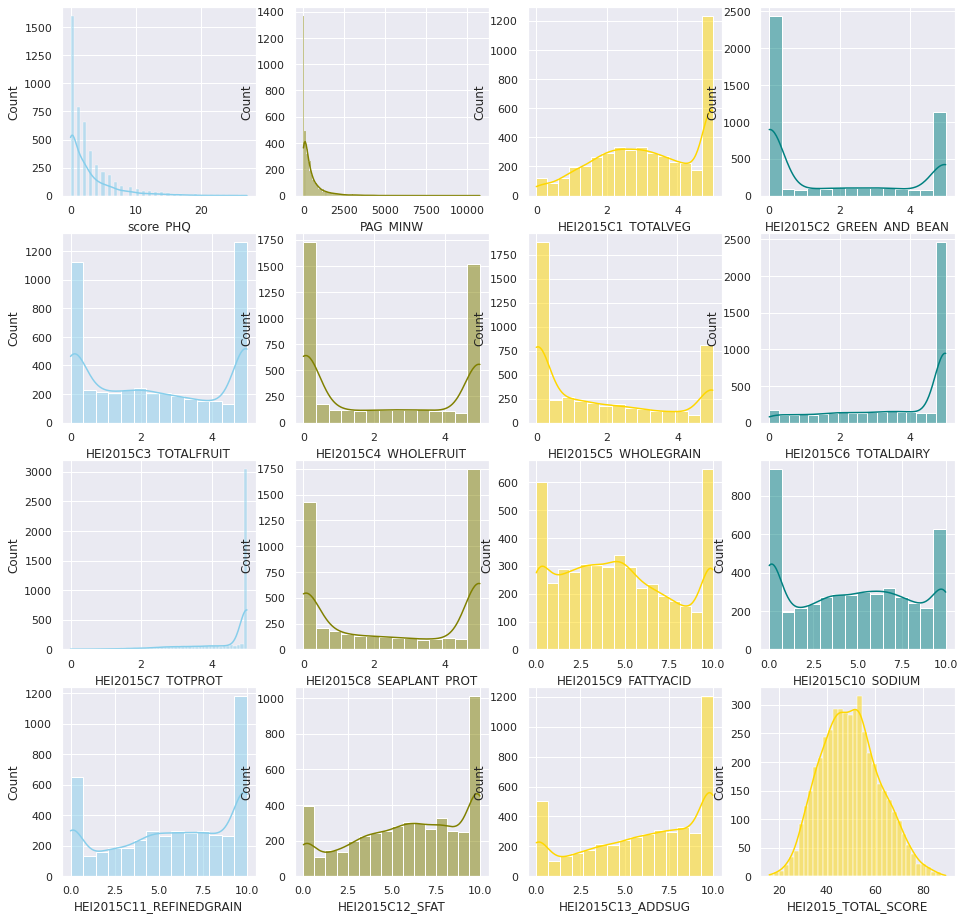

In [25]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

sns.histplot(data=df_grouped, x="score_PHQ", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_grouped, x="PAG_MINW", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_grouped, x="HEI2015C1_TOTALVEG", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df_grouped, x="HEI2015C2_GREEN_AND_BEAN", kde=True, color="teal", ax=axs[0, 3])
sns.histplot(data=df_grouped, x="HEI2015C3_TOTALFRUIT", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df_grouped, x="HEI2015C4_WHOLEFRUIT", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=df_grouped, x="HEI2015C5_WHOLEGRAIN", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=df_grouped, x="HEI2015C6_TOTALDAIRY", kde=True, color="teal", ax=axs[1, 3])
sns.histplot(data=df_grouped, x="HEI2015C7_TOTPROT", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df_grouped, x="HEI2015C8_SEAPLANT_PROT", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df_grouped, x="HEI2015C9_FATTYACID", kde=True, color="gold", ax=axs[2, 2])
sns.histplot(data=df_grouped, x="HEI2015C10_SODIUM", kde=True, color="teal", ax=axs[2, 3])
sns.histplot(data=df_grouped, x="HEI2015C11_REFINEDGRAIN", kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=df_grouped, x="HEI2015C12_SFAT", kde=True, color="olive", ax=axs[3, 1])
sns.histplot(data=df_grouped, x="HEI2015C13_ADDSUG", kde=True, color="gold", ax=axs[3, 2])
sns.histplot(data=df_grouped, x="HEI2015_TOTAL_SCORE", kde=True, color="gold", ax=axs[3, 3])

plt.show()

In [26]:
for _ in quantitative_variables:
  print(_,':',skew(df_grouped[_]))

score_PHQ : 2.2812114495309017
PAG_MINW : 4.601480666292594
HEI2015C1_TOTALVEG : -0.2798659116428125
HEI2015C2_GREEN_AND_BEAN : 0.5759717744199014
HEI2015C3_TOTALFRUIT : 0.0734765520231187
HEI2015C4_WHOLEFRUIT : 0.1256037523839781
HEI2015C5_WHOLEGRAIN : 0.636445818446035
HEI2015C6_TOTALDAIRY : -0.9841989794448028
HEI2015C7_TOTPROT : -1.934938103713223
HEI2015C8_SEAPLANT_PROT : -0.03155440702311832
HEI2015C9_FATTYACID : 0.21844421521219592
HEI2015C10_SODIUM : 0.031304888441515036
HEI2015C11_REFINEDGRAIN : -0.3495857496759658
HEI2015C12_SFAT : -0.38719829187585925
HEI2015C13_ADDSUG : -0.5115920692870616
HEI2015_TOTAL_SCORE : 0.2314284158248308


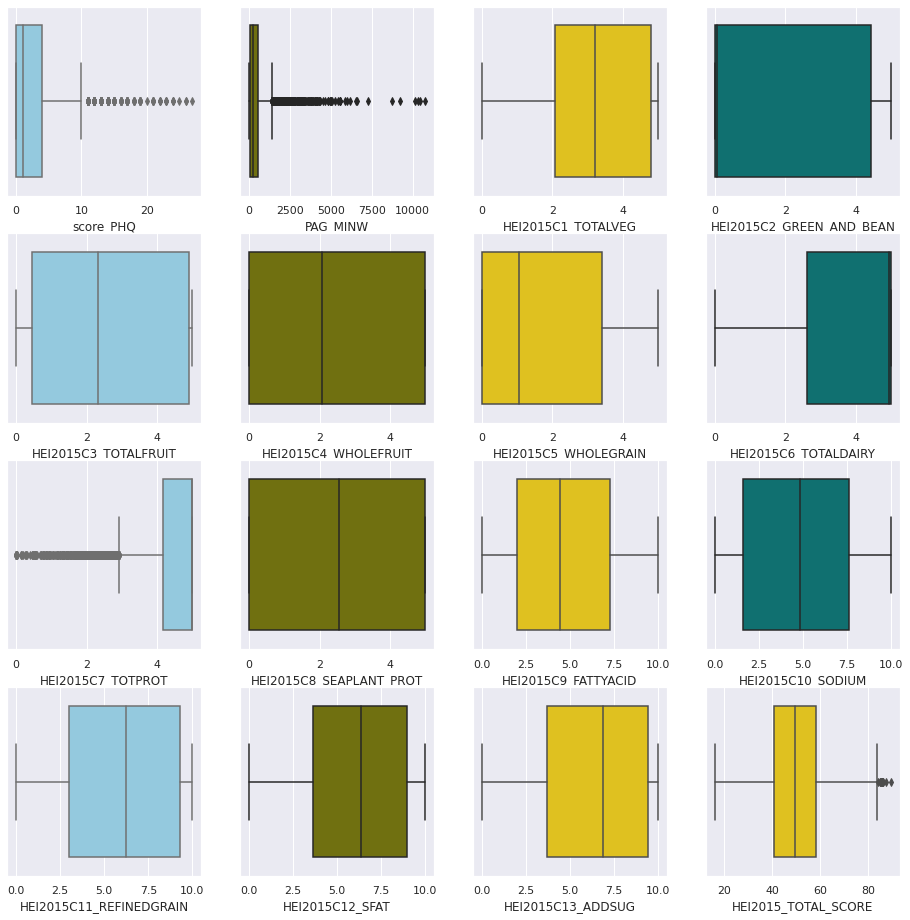

In [27]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

sns.boxplot(data=df_grouped, x="score_PHQ", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df_grouped, x="PAG_MINW", color="olive", ax=axs[0, 1])
sns.boxplot(data=df_grouped, x="HEI2015C1_TOTALVEG", color="gold", ax=axs[0, 2])
sns.boxplot(data=df_grouped, x="HEI2015C2_GREEN_AND_BEAN", color="teal", ax=axs[0, 3])
sns.boxplot(data=df_grouped, x="HEI2015C3_TOTALFRUIT", color="skyblue", ax=axs[1, 0])
sns.boxplot(data=df_grouped, x="HEI2015C4_WHOLEFRUIT", color="olive", ax=axs[1, 1])
sns.boxplot(data=df_grouped, x="HEI2015C5_WHOLEGRAIN", color="gold", ax=axs[1, 2])
sns.boxplot(data=df_grouped, x="HEI2015C6_TOTALDAIRY", color="teal", ax=axs[1, 3])
sns.boxplot(data=df_grouped, x="HEI2015C7_TOTPROT", color="skyblue", ax=axs[2, 0])
sns.boxplot(data=df_grouped, x="HEI2015C8_SEAPLANT_PROT", color="olive", ax=axs[2, 1])
sns.boxplot(data=df_grouped, x="HEI2015C9_FATTYACID", color="gold", ax=axs[2, 2])
sns.boxplot(data=df_grouped, x="HEI2015C10_SODIUM", color="teal", ax=axs[2, 3])
sns.boxplot(data=df_grouped, x="HEI2015C11_REFINEDGRAIN", color="skyblue", ax=axs[3, 0])
sns.boxplot(data=df_grouped, x="HEI2015C12_SFAT", color="olive", ax=axs[3, 1])
sns.boxplot(data=df_grouped, x="HEI2015C13_ADDSUG", color="gold", ax=axs[3, 2])
sns.boxplot(data=df_grouped, x="HEI2015_TOTAL_SCORE", color="gold", ax=axs[3, 3])

plt.show()

#### **Qualitative variables**

In [28]:
qualitative_variables=['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDRETH1', 'ADHERENCE', 'DMDEDUC', 'INDFMINC']

In [29]:
len(qualitative_variables)

14

In [30]:
df_grouped_DPQ010=df_grouped.groupby("DPQ010")['SEQN'].count().to_frame().reset_index()
df_grouped_DPQ020=df_grouped.groupby("DPQ020")['SEQN'].count().to_frame().reset_index()
df_grouped_DPQ030=df_grouped.groupby("DPQ030")['SEQN'].count().to_frame().reset_index()
df_grouped_DPQ040=df_grouped.groupby("DPQ040")['SEQN'].count().to_frame().reset_index()
df_grouped_DPQ050=df_grouped.groupby("DPQ050")['SEQN'].count().to_frame().reset_index()
df_grouped_DPQ060=df_grouped.groupby("DPQ060")['SEQN'].count().to_frame().reset_index()
df_grouped_DPQ070=df_grouped.groupby("DPQ070")['SEQN'].count().to_frame().reset_index()
df_grouped_DPQ080=df_grouped.groupby("DPQ080")['SEQN'].count().to_frame().reset_index()
df_grouped_DPQ090=df_grouped.groupby("DPQ090")['SEQN'].count().to_frame().reset_index()

In [31]:
fig = make_subplots(
    rows=2, cols=5,
    subplot_titles=('DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090'))

fig.add_trace(go.Bar(x=df_grouped_DPQ010['DPQ010'], y=df_grouped_DPQ010['SEQN'],text=df_grouped_DPQ010['SEQN']),
              row=1, col=1)

fig.add_trace(go.Bar(x=df_grouped_DPQ020['DPQ020'], y=df_grouped_DPQ020['SEQN'],text=df_grouped_DPQ010['SEQN']),
              row=1, col=2)

fig.add_trace(go.Bar(x=df_grouped_DPQ030['DPQ030'], y=df_grouped_DPQ030['SEQN'],text=df_grouped_DPQ030['SEQN']),
              row=1, col=3)

fig.add_trace(go.Bar(x=df_grouped_DPQ040['DPQ040'], y=df_grouped_DPQ040['SEQN'],text=df_grouped_DPQ040['SEQN']),
              row=1, col=4)

fig.add_trace(go.Bar(x=df_grouped_DPQ050['DPQ050'], y=df_grouped_DPQ050['SEQN'],text=df_grouped_DPQ050['SEQN']),
              row=1, col=5)

fig.add_trace(go.Bar(x=df_grouped_DPQ060['DPQ060'], y=df_grouped_DPQ060['SEQN'],text=df_grouped_DPQ060['SEQN']),
              row=2, col=1)

fig.add_trace(go.Bar(x=df_grouped_DPQ070['DPQ070'], y=df_grouped_DPQ070['SEQN'],text=df_grouped_DPQ070['SEQN']),
              row=2, col=2)

fig.add_trace(go.Bar(x=df_grouped_DPQ080['DPQ080'], y=df_grouped_DPQ080['SEQN'],text=df_grouped_DPQ080['SEQN']),
              row=2, col=3)

fig.add_trace(go.Bar(x=df_grouped_DPQ090['DPQ090'], y=df_grouped_DPQ090['SEQN'],text=df_grouped_DPQ090['SEQN']),
              row=2, col=4)

fig.update_layout(height=500, width=1700,
                  title_text="Multiple Subplots with Titles")

fig.update_traces(marker_color="#7c826b")
fig.update_layout(title_text='Analysing the answers of the PHQ-9 questionnaire',plot_bgcolor='#ece2db')
fig.update_yaxes(showgrid=False,zeroline=False, visible=False,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=True, hoverformat=False)
fig.show()


Observing the answers of the questionnaire, most people said they have none or very little depressive syntoms (numbers 0 and 1). 

## Relationship between variables

In [32]:
df_grouped.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'score_PHQ', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

#### Quantitative variable x Score PHQ

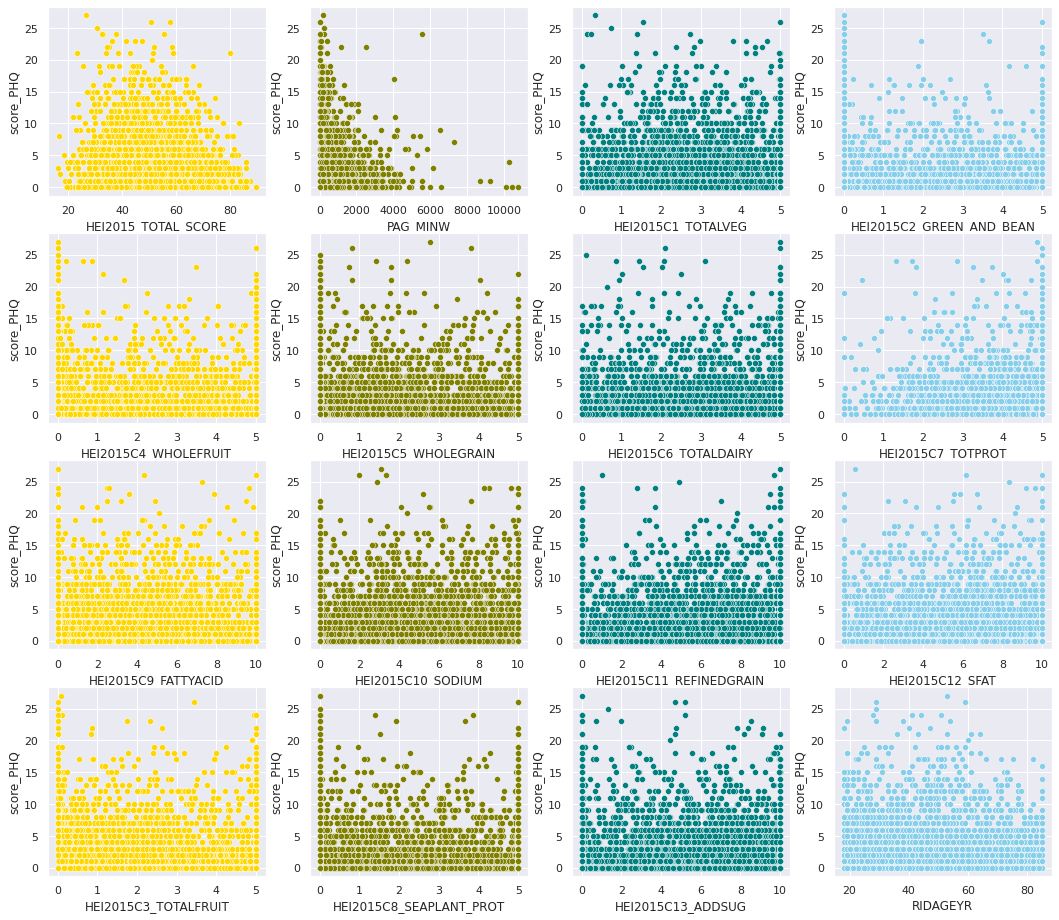

In [33]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 4, figsize=(18, 16))

sns.scatterplot(data=df_grouped, x="HEI2015_TOTAL_SCORE", y="score_PHQ", color="gold",ax=axs[0, 0])
sns.scatterplot(data=df_grouped, x="PAG_MINW",  y="score_PHQ", color="olive", ax=axs[0, 1])
sns.scatterplot(data=df_grouped, x="HEI2015C1_TOTALVEG", y="score_PHQ",  color="teal", ax=axs[0, 2])
sns.scatterplot(data=df_grouped, x="HEI2015C2_GREEN_AND_BEAN", y="score_PHQ",  color="skyblue", ax=axs[0, 3])
sns.scatterplot(data=df_grouped, x="HEI2015C4_WHOLEFRUIT", y="score_PHQ",  color="gold", ax=axs[1, 0])
sns.scatterplot(data=df_grouped, x="HEI2015C5_WHOLEGRAIN", y="score_PHQ",  color="olive", ax=axs[1, 1])
sns.scatterplot(data=df_grouped, x="HEI2015C6_TOTALDAIRY", y="score_PHQ",  color="teal", ax=axs[1, 2])
sns.scatterplot(data=df_grouped, x="HEI2015C7_TOTPROT", y="score_PHQ",  color="skyblue", ax=axs[1, 3])
sns.scatterplot(data=df_grouped, x="HEI2015C9_FATTYACID", y="score_PHQ",  color="gold", ax=axs[2, 0])
sns.scatterplot(data=df_grouped, x="HEI2015C10_SODIUM", y="score_PHQ",  color="olive", ax=axs[2, 1])
sns.scatterplot(data=df_grouped, x="HEI2015C11_REFINEDGRAIN", y="score_PHQ",  color="teal", ax=axs[2, 2])
sns.scatterplot(data=df_grouped, x="HEI2015C12_SFAT", y="score_PHQ",  color="skyblue", ax=axs[2, 3])
sns.scatterplot(data=df_grouped, x="HEI2015C3_TOTALFRUIT", y="score_PHQ",  color="gold", ax=axs[3, 0])
sns.scatterplot(data=df_grouped, x="HEI2015C8_SEAPLANT_PROT", y="score_PHQ",  color="olive", ax=axs[3, 1])
sns.scatterplot(data=df_grouped, x="HEI2015C13_ADDSUG", y="score_PHQ", color="teal", ax=axs[3, 2])
sns.scatterplot(data=df_grouped, x="RIDAGEYR", y="score_PHQ", color="skyblue", ax=axs[3, 3])
plt.show()

It does not seem to have any correlation between the quantitative variables and the score PHQ. But we will have a farder investigation about it.


#### Qualitative variables x Score PHQ

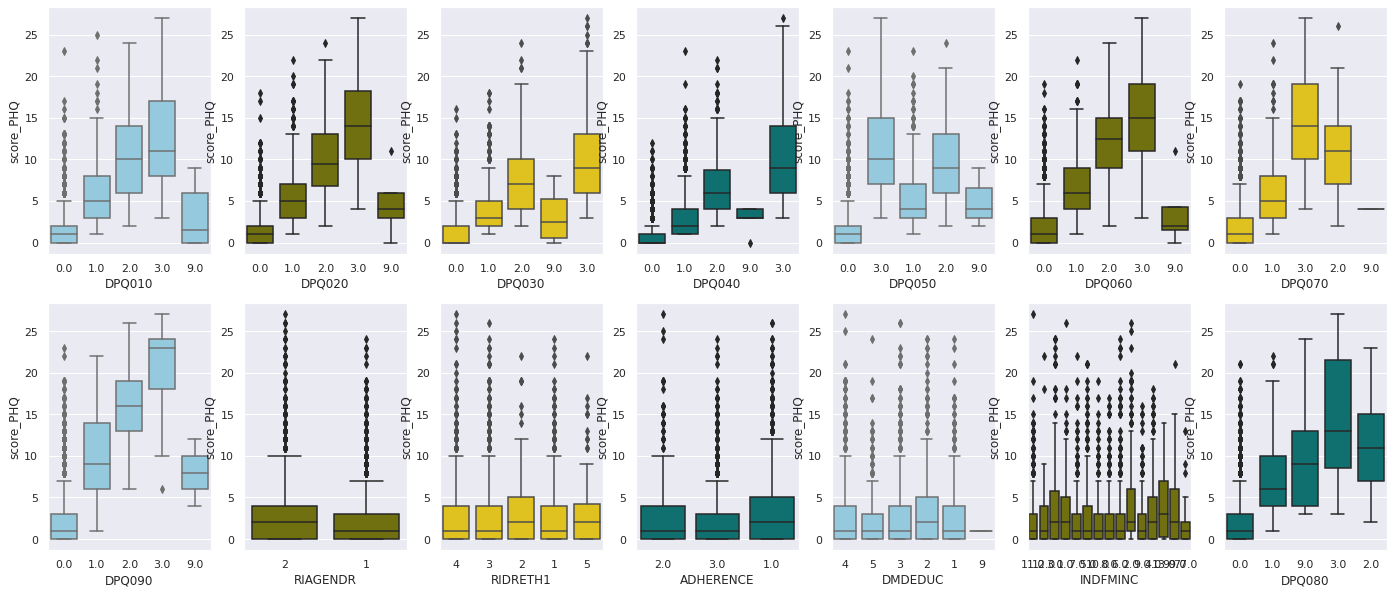

In [34]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 7, figsize=(24, 10))

sns.boxplot(data=df_grouped, x="DPQ010", y='score_PHQ', color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df_grouped, x="DPQ020", y='score_PHQ', color="olive", ax=axs[0, 1])
sns.boxplot(data=df_grouped, x="DPQ030", y='score_PHQ', color="gold", ax=axs[0, 2])
sns.boxplot(data=df_grouped, x="DPQ040", y='score_PHQ', color="teal", ax=axs[0, 3])
sns.boxplot(data=df_grouped, x="DPQ050", y='score_PHQ', color="skyblue", ax=axs[0, 4])
sns.boxplot(data=df_grouped, x="DPQ060", y='score_PHQ', color="olive", ax=axs[0, 5])
sns.boxplot(data=df_grouped, x="DPQ070", y='score_PHQ', color="gold", ax=axs[0, 6])
sns.boxplot(data=df_grouped, x="DPQ090", y='score_PHQ', color="skyblue", ax=axs[1, 0])
sns.boxplot(data=df_grouped, x="RIAGENDR", y='score_PHQ', color="olive", ax=axs[1, 1])
sns.boxplot(data=df_grouped, x="RIDRETH1", y='score_PHQ', color="gold", ax=axs[1, 2])
sns.boxplot(data=df_grouped, x="ADHERENCE", y='score_PHQ', color="teal", ax=axs[1, 3])
sns.boxplot(data=df_grouped, x="DMDEDUC", y='score_PHQ', color="skyblue", ax=axs[1, 4])
sns.boxplot(data=df_grouped, x="INDFMINC", y='score_PHQ', color="olive", ax=axs[1, 5])
sns.boxplot(data=df_grouped, x="DPQ080", y='score_PHQ', color="teal", ax=axs[1, 6])


plt.show()

#### **The relation between food consumption and depression**

A dietary pattern characterized by a high intake of fruit, vegetables, whole grain, fish, olive oil, low-fat dairy and antioxidants and low intakes of animal foods was apparently associated with a decreased risk of depression. A dietary pattern characterized by a high consumption of red and/or processed meat, refined grains, sweets, high-fat dairy products, butter, potatoes and high-fat gravy, and low intakes of fruits and vegetables is associated with an increased risk of depression.

Link: https://www.health.harvard.edu/blog/diet-and-depression-2018022213309



In [35]:
food_consumption=['HEI2015C1_TOTALVEG','HEI2015C2_GREEN_AND_BEAN','HEI2015C3_TOTALFRUIT','HEI2015C4_WHOLEFRUIT','HEI2015C5_WHOLEGRAIN','HEI2015C6_TOTALDAIRY','HEI2015C7_TOTPROT',
                  'HEI2015C8_SEAPLANT_PROT','HEI2015C9_FATTYACID','HEI2015C10_SODIUM','HEI2015C11_REFINEDGRAIN','HEI2015C12_SFAT','HEI2015C13_ADDSUG','HEI2015_TOTAL_SCORE','score_PHQ']

In [36]:
df_food=df_grouped[food_consumption]

In [37]:
df_food.head()

,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,score_PHQ
1,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0
2,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0
3,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0
4,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0
5,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0


In [129]:
correlations=df_food.corr()

In [130]:
correlations

,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,score_PHQ
HEI2015C1_TOTALVEG,1.000000,0.393409,0.133604,0.180857,0.092380,-0.020571,0.129376,0.176571,0.148463,-0.227202,0.112642,0.084325,0.304733,0.404416,-0.050268
HEI2015C2_GREEN_AND_BEAN,0.393409,1.000000,0.121627,0.145442,0.067632,-0.022626,0.179221,0.457869,0.110129,-0.044793,0.007710,0.123613,0.153035,0.458687,-0.032840
HEI2015C3_TOTALFRUIT,0.133604,0.121627,1.000000,0.753710,0.245668,0.074475,-0.006325,0.102411,0.038346,0.106779,0.099493,0.193110,0.237095,0.573822,-0.053213
HEI2015C4_WHOLEFRUIT,0.180857,0.145442,0.753710,1.000000,0.246464,0.110608,0.017676,0.129932,0.038020,0.071129,0.077136,0.146658,0.224497,0.567893,-0.050173
HEI2015C5_WHOLEGRAIN,0.092380,0.067632,0.245668,0.246464,1.000000,0.149736,-0.037874,0.103286,0.065662,-0.055513,0.201010,0.102708,0.224077,0.439671,-0.050702
HEI2015C6_TOTALDAIRY,-0.020571,-0.022626,0.074475,0.110608,0.149736,1.000000,-0.165504,-0.033708,-0.446173,-0.031197,-0.001528,-0.332028,0.123801,-0.020368,-0.024648
HEI2015C7_TOTPROT,0.129376,0.179221,-0.006325,0.017676,-0.037874,-0.165504,1.000000,0.323396,0.157723,-0.151700,0.149028,-0.011983,0.178923,0.245961,-0.059247
HEI2015C8_SEAPLANT_PROT,0.176571,0.457869,0.102411,0.129932,0.103286,-0.033708,0.323396,1.000000,0.220471,0.035171,0.049579,0.130315,0.139461,0.505445,-0.041429
HEI2015C9_FATTYACID,0.148463,0.110129,0.038346,0.038020,0.065662,-0.446173,0.157723,0.220471,1.000000,-0.016625,-0.039738,0.592488,0.057969,0.468069,-0.020463
HEI2015C10_SODIUM,-0.227202,-0.044793,0.106779,0.071129,-0.055513,-0.031197,-0.151700,0.035171,-0.016625,1.000000,0.174252,0.134840,-0.294665,0.252110,0.034713


In [132]:
correlations.reset_index(inplace=True)

In [134]:
correlations[['index','score_PHQ']]

,index,score_PHQ
0,HEI2015C1_TOTALVEG,-0.050268
1,HEI2015C2_GREEN_AND_BEAN,-0.032840
2,HEI2015C3_TOTALFRUIT,-0.053213
3,HEI2015C4_WHOLEFRUIT,-0.050173
4,HEI2015C5_WHOLEGRAIN,-0.050702
5,HEI2015C6_TOTALDAIRY,-0.024648
6,HEI2015C7_TOTPROT,-0.059247
7,HEI2015C8_SEAPLANT_PROT,-0.041429
8,HEI2015C9_FATTYACID,-0.020463
9,HEI2015C10_SODIUM,0.034713


It does not seem to be any kind of correlation between the score and the nutrient consuption.

#### **The relation between exercise and depression**

Exercising starts a biological cascade of events that results in many health benefits, such as protecting against heart disease and diabetes, improving sleep, and lowering blood pressure. High-intensity exercise releases the body's feel-good chemicals called endorphins, resulting in the "runner's high" that joggers report. But for most of us, the real value is in low-intensity exercise sustained over time. That kind of activity spurs the release of proteins called neurotrophic or growth factors, which cause nerve cells to grow and make new connections. The improvement in brain function makes you feel better. "In people who are depressed, neuroscientists have noticed that the hippocampus in the brain—the region that helps regulate mood—is smaller. Exercise supports nerve cell growth in the hippocampus, improving nerve cell connections, which helps relieve depression" .

Link: https://www.health.harvard.edu/mind-and-mood/exercise-is-an-all-natural-treatment-to-fight-depression

In [39]:
(df_grouped
 .groupby('ADHERENCE')
 ['score_PHQ'].mean()
 .to_frame())

,score_PHQ
ADHERENCE,
1.0,3.196039
2.0,2.549391
3.0,2.347041


In [40]:
fig = px.box(df_grouped, x="ADHERENCE", y="score_PHQ")
fig.update_traces(marker_color="#7c826b")
fig.update_layout(title_text='Amount of time spent on exercising vs PHQ score',height=500,width=700,plot_bgcolor='#ece2db')
fig.update_yaxes(showgrid=False,zeroline=False, visible=True,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=True, hoverformat=False)
fig.show()


Firts, let's remember our groups:
* 1: Low (< 150 min per week)
* 2: Adequate ( 150-300 min per week)
* 3: Above ( > 300 min per week)

According to these, people who practice more exercise per week have lower PHQ score. Which is good. To be sure, we will perform an hipothesys test.

We intend to use 1 way ANOVA to verify if there's somE difference between the means. But first, there are some things we have to check:

* The samples are random.
* The groups are independent.
* The independent variable is category.
* The data follows a normal distribution or we have more than 15 observations.
* The variance in each group are very similar.

We are sure about all the points, except the one about the variance, so let's test it.

We'll perform a Bartlett test:
* The null hypothesis is that all the variances are equal.
* The alternative hypothesis is that one or more of the variance are different. 


In [41]:
list_1c = df_grouped[df_grouped["ADHERENCE"] == '1.0']["score_PHQ"].dropna()
list_2c = df_grouped[df_grouped["ADHERENCE"] == '2.0']["score_PHQ"].dropna()
list_3c = df_grouped[df_grouped["ADHERENCE"] == '3.0']["score_PHQ"].dropna()

In [42]:
stats.bartlett(list_1c, list_2c, list_3c)

BartlettResult(statistic=141.20942361954317, pvalue=2.1715171550287e-31)

The pvalue is really low, so we can assume the variances are not the same. In this case, let's use the Welch ANOVA.

In [43]:
pg.welch_anova(dv='score_PHQ', between='ADHERENCE', data=df_grouped)

,Source,ddof1,ddof2,F,p-unc,np2
0,ADHERENCE,2,2028.611509,25.668971,9.791101e-12,0.011291


As the pvalue is very low we can reject the null hypothesis and conclude all the mans are not the same. Now, let's see which ones are difference. We are going to use the Games Howell test to see the differences. The Reason we chose this test is because it doesn't assume normality, same variance and size of the samples to be the same.

In [44]:
pg.pairwise_gameshowell(dv='score_PHQ', between='ADHERENCE', data=df_grouped)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1.0,2.0,3.196039,2.549391,0.646648,0.163355,3.958548,1530.140753,2.325690e-04,0.170724
1,1.0,3.0,3.196039,2.347041,0.848997,0.119129,7.126704,3686.056659,6.202705e-12,0.226377
2,2.0,3.0,2.549391,2.347041,0.202350,0.151322,1.337210,1197.424002,3.747852e-01,0.057573


Pvalue in the groups 1 and 2 is very low, so we can assume the means are different.

Pvalue in the groups 1 and 3 is also low, so we can assume their means are also different.

But Pvalue in groups 2 and 3 is not low, so in these groups we can assume the means are equal.

With this, we can say that practicing at least 150 minutes of exercise per week has a beneficial impact in the phq score.

#### **The relation between education and depression**

Education may affect depression through various socioeconomic pathways. First, people with less schooling may have fewer economic and social resources to address depressive episodes. Second, education affects socioeconomic position and people who ranked themselves lower in the social milieu, based in part on educational attainment, had higher odds of depression than those with higher social ranks. Third, education increases access to employment opportunities that are more creative, mentally stimulating, and involve higher autonomy, which also may affect mental well-being. These and other benefits of education for health and well-being can accumulate over one’s life.

Link: https://www.cdc.gov/pcd/issues/2020/20_0098.htm

Let's remember our categories:
* 1: Less than 9th year
* 2: 9th-12nd year
* 3: Gigh school
* 4: Unfinished graduation
* 5: Graduation or more
* 7: Refused to answer
* 9: Does not know

Here, we will use the same statistic approach than in the exercise analysis.

In [45]:
(df_grouped
 .groupby('DMDEDUC')
 ['score_PHQ'].mean()
 .to_frame())

,score_PHQ
DMDEDUC,
1,3.098592
2,3.153846
3,2.853904
4,2.703566
5,2.016260
9,1.000000


In [46]:
fig = px.box(df_grouped, x="DMDEDUC", y="score_PHQ")
fig.update_traces(marker_color="#7c826b")
fig.update_layout(title_text='Education vs PHQ score',height=500,width=700,plot_bgcolor='#ece2db')
fig.update_yaxes(showgrid=False,zeroline=False, visible=True,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=True, hoverformat=False)
fig.show()

In [47]:
list_1c = df_grouped[df_grouped["DMDEDUC"] == '1']["score_PHQ"].dropna()
list_2c = df_grouped[df_grouped["DMDEDUC"] == '2']["score_PHQ"].dropna()
list_3c = df_grouped[df_grouped["DMDEDUC"] == '3']["score_PHQ"].dropna()
list_4c = df_grouped[df_grouped["DMDEDUC"] == '4']["score_PHQ"].dropna()
list_5c = df_grouped[df_grouped["DMDEDUC"] == '5']["score_PHQ"].dropna()
list_9c = df_grouped[df_grouped["DMDEDUC"] == '9']["score_PHQ"].dropna()

In [48]:
stats.bartlett(list_1c, list_2c, list_3c, list_4c, list_5c)

BartlettResult(statistic=188.316595820998, pvalue=1.2190385995606138e-39)

In [49]:
pg.welch_anova(dv='score_PHQ', between='DMDEDUC', data=df_grouped)

,Source,ddof1,ddof2,F,p-unc,np2
0,DMDEDUC,5,2828.69808,13.72786,2.861466e-13,0.010213


In [50]:
pg.pairwise_gameshowell(dv='score_PHQ', between='DMDEDUC', data=df_grouped)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,3.098592,3.153846,-0.055255,0.237071,-0.233072,1042.824462,9.999062e-01,-0.013285
1,1,3,3.098592,2.853904,0.244687,0.218051,1.122157,868.430478,8.722350e-01,0.059898
2,1,4,3.098592,2.703566,0.395025,0.213215,1.852714,809.734227,4.324333e-01,0.097206
3,1,5,3.098592,2.016260,1.082331,0.208154,5.199674,735.764109,3.847786e-06,0.292756
4,1,9,3.098592,1.000000,2.098592,NaN,NaN,NaN,NaN,NaN
5,2,3,3.153846,2.853904,0.299942,0.183658,1.633150,1648.793403,5.765628e-01,0.074461
6,2,4,3.153846,2.703566,0.450280,0.177890,2.531233,1566.687357,1.157000e-01,0.112697
7,2,5,3.153846,2.016260,1.137586,0.171791,6.621906,1364.237236,7.615341e-10,0.324404
8,2,9,3.153846,1.000000,2.153846,NaN,NaN,NaN,NaN,NaN
9,3,4,2.853904,2.703566,0.150338,0.151619,0.991552,2477.637761,9.207660e-01,0.039434


All differences are between group 5 vs any other group, although, the aren't any significative differences between the other groups.

#### **The relation between income and depression**

We now know that loss of income causes mental illness. Negative income shocks, such as bad harvests due to poor rainfall or job losses due to factory closures, worsen mental health. Conversely, cash transfers and broader antipoverty programs reduce depression and anxiety in randomized trials. Multiple mechanisms mediate this causal chain. Poverty is associated with volatile income and expenditures. The resulting worries and uncertainty can worsen mental health. Providing health, employment, or weather insurance, or other ways of smoothing shocks, may thus lower depression and anxiety. Living in inadequate housing in low-income neighborhoods, the poor are also more exposed to environmental stresses such as pollution, temperature extremes, and challenging sleep environments, which can cause mental illness. Early-life conditions—poverty experienced in childhood and in utero—increase the likelihood of poor nutrition and other stressors, resulting in impaired cognitive development and adult mental illness. 

Link: https://www.science.org/doi/10.1126/science.aay0214

Categories:
  * 1: 0-4999
  * 2: 5000-9999
  * 3: 10000-14999
  * 4: 15000-19999
  * 5: 20000-24999
  * 6: 25000-34999
  * 7: 35000-44999
  * 8: 45000-54999
  * 9: 55000-64999
  * 10: 65000-74999 
  * 11: Equal or above 75000
  * 12: Over 20000
  * 13: Less than 20000
  * 77: Refused to answer
  * 99: Does not know

In [51]:
(df_grouped
 .groupby('INDFMINC')
 ['score_PHQ'].mean()
 .to_frame())

,score_PHQ
INDFMINC,
1.0,3.251497
10.0,2.490040
11.0,2.065776
12.0,2.692308
13.0,4.346154
2.0,4.212000
3.0,3.878238
4.0,3.315642
5.0,3.095628


In [52]:
fig = px.box(df_grouped, x="INDFMINC", y="score_PHQ")
fig.update_traces(marker_color="#7c826b")
fig.update_layout(title_text='Income vs PHQ score',height=500,width=700,plot_bgcolor='#ece2db')
fig.update_yaxes(showgrid=False,zeroline=False, visible=True,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=True, hoverformat=False)
fig.show()

In [53]:
df_grouped['INDFMINC'].unique()

array(['11.0', '12.0', '3.0', '1.0', '7.0', '5.0', '10.0', '8.0', '6.0',
       '2.0', '9.0', '4.0', '13.0', '99.0', '77.0'], dtype=object)

In [54]:
list_1c = df_grouped[df_grouped["INDFMINC"] == '1.0']["score_PHQ"].dropna()
list_2c = df_grouped[df_grouped["INDFMINC"] == '2.0']["score_PHQ"].dropna()
list_3c = df_grouped[df_grouped["INDFMINC"] == '3.0']["score_PHQ"].dropna()
list_4c = df_grouped[df_grouped["INDFMINC"] == '4.0']["score_PHQ"].dropna()
list_5c = df_grouped[df_grouped["INDFMINC"] == '5.0']["score_PHQ"].dropna()
list_6c = df_grouped[df_grouped["INDFMINC"] == '6.0']["score_PHQ"].dropna()
list_7c = df_grouped[df_grouped["INDFMINC"] == '7.0']["score_PHQ"].dropna()
list_8c = df_grouped[df_grouped["INDFMINC"] == '8.0']["score_PHQ"].dropna()
list_9c = df_grouped[df_grouped["INDFMINC"] == '9.0']["score_PHQ"].dropna()
list_10c = df_grouped[df_grouped["INDFMINC"] == '10.0']["score_PHQ"].dropna()
list_11c = df_grouped[df_grouped["INDFMINC"] == '11.0']["score_PHQ"].dropna()
list_12c = df_grouped[df_grouped["INDFMINC"] == '12.0']["score_PHQ"].dropna()
list_13c = df_grouped[df_grouped["INDFMINC"] == '13.0']["score_PHQ"].dropna()
list_77c = df_grouped[df_grouped["INDFMINC"] == '77.0']["score_PHQ"].dropna()
list_99c = df_grouped[df_grouped["INDFMINC"] == '99.0']["score_PHQ"].dropna()


In [55]:
stats.bartlett(list_1c, list_2c, list_3c, list_4c, list_5c, list_6c, list_7c, list_8c, list_9c, list_10c, list_11c, list_12c, list_13c, list_77c, list_99c)

BartlettResult(statistic=355.36269450376653, pvalue=3.085469515771997e-67)

In [56]:
pg.welch_anova(dv='score_PHQ', between='INDFMINC', data=df_grouped)

,Source,ddof1,ddof2,F,p-unc,np2
0,INDFMINC,14,529.901331,8.412507,1.681282e-16,0.031039


In [135]:
df_income=pg.pairwise_gameshowell(dv='score_PHQ', between='INDFMINC', data=df_grouped)

In [136]:
df_income

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1.0,10.0,3.251497,2.490040,0.761457,0.383307,1.986544,297.592680,0.804808,0.198019
1,1.0,11.0,3.251497,2.065776,1.185721,0.335386,3.535390,193.921191,0.036839,0.295930
2,1.0,12.0,3.251497,2.692308,0.559189,0.585181,0.955583,122.995356,0.999740,0.139244
3,1.0,13.0,3.251497,4.346154,-1.094657,0.949083,-1.153384,31.871600,0.996866,-0.242213
4,1.0,2.0,3.251497,4.212000,-0.960503,0.465355,-2.064023,404.140403,0.757893,-0.205906
...,...,...,...,...,...,...,...,...,...,...
100,77.0,9.0,2.111111,2.227612,-0.116501,0.667324,-0.174579,30.472589,1.000000,-0.035159
101,77.0,99.0,2.111111,3.547170,-1.436059,0.854514,-1.680556,63.022038,0.931204,-0.393521
102,8.0,9.0,2.338673,2.227612,0.111061,0.237573,0.467480,578.974664,1.000000,0.036231
103,8.0,99.0,2.338673,3.547170,-1.208497,0.584221,-2.068560,59.499033,0.749204,-0.300413


In [137]:
df_income.loc[df_income['pval']<0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
1,1.0,11.0,3.251497,2.065776,1.185721,0.335386,3.535390,193.921191,3.683862e-02,0.295930
17,10.0,2.0,2.490040,4.212000,-1.721960,0.394277,-4.367387,414.993477,1.488752e-03,-0.389655
18,10.0,3.0,2.490040,3.878238,-1.388199,0.321811,-4.313704,633.866843,1.739576e-03,-0.349362
29,11.0,2.0,2.065776,4.212000,-2.146224,0.347870,-6.169611,287.479078,2.414515e-07,-0.437198
30,11.0,3.0,2.065776,3.878238,-1.812462,0.262910,-6.893842,496.225469,1.736948e-09,-0.414458
31,11.0,4.0,2.065776,3.315642,-1.249867,0.228380,-5.472756,501.946111,7.210850e-06,-0.338105
32,11.0,5.0,2.065776,3.095628,-1.029852,0.237721,-4.332191,499.247639,1.667735e-03,-0.265496
63,2.0,6.0,4.212000,2.541118,1.670882,0.367861,4.542149,354.051142,7.318971e-04,0.340959
64,2.0,7.0,4.212000,2.381156,1.830844,0.364806,5.018680,342.098957,8.398673e-05,0.392884
66,2.0,8.0,4.212000,2.338673,1.873327,0.367245,5.101032,349.732823,5.593034e-05,0.404064


There are significante differences between the groups.

#### **The relation between gender and depression**

The higher rate of depression in women isn't due to biology alone. Life circumstances and cultural stressors can play a role, too. Although these stressors also occur in men, it's usually at a lower rate. Factors that may increase the risk of depression in women include:

* Unequal power and status. Women are much more likely than men to live in poverty, causing concerns such as uncertainty about the future and decreased access to community and health care resources. These issues can cause feelings of negativity, low self-esteem and lack of control over life.
* Work overload. Often women work outside the home and still handle home responsibilities. Many women deal with the challenges of single parenthood, such as working multiple jobs to make ends meet. Also, women may be caring for their children while also caring for sick or older family members.
* Sexual or physical abuse. Women who were emotionally, physically or sexually abused as children or adults are more likely to experience depression at some point in their lives than those who weren't abused. Women are more likely than men to experience sexual abuse.

Link: https://www.mayoclinic.org/diseases-conditions/depression/in-depth/depression/art-20047725

Categories:
  * 1: Male
  * 2: Female

In [60]:
df_grouped.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'score_PHQ', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

In [61]:
(df_grouped
 .groupby('RIAGENDR')
 ['score_PHQ'].mean()
 .to_frame())

,score_PHQ
RIAGENDR,
1,2.312141
2,3.126795


In [62]:
fig = px.box(df_grouped, x="RIAGENDR", y="score_PHQ")
fig.update_traces(marker_color="#7c826b")
fig.update_layout(title_text='Gender vs PHQ score',height=500,width=700,plot_bgcolor='#ece2db')
fig.update_yaxes(showgrid=False,zeroline=False, visible=True,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=True, hoverformat=False)
fig.show()

In [63]:
df_male=df_grouped.query("RIAGENDR == '1'")

In [64]:
male=df_male['score_PHQ']

In [65]:
df_female=df_grouped.query("RIAGENDR == '2'")

In [66]:
female=df_female['score_PHQ']

In [67]:
stats.ttest_ind(a = male,b = female,equal_var=True)

Ttest_indResult(statistic=-7.49845291143233, pvalue=7.675103240709812e-14)

The p-value indicates that there are significante differences in the PHQ score between male and female individuals.

#### **The relation between ethnicity and depression**

Studies that have explored the prevalence and distribution of major depressive disorder in African Americans, non-Hispanic Caucasians Americans and Caribbean African Americans have found that overall lifetime prevalence of major depressive disorder among Caucasians was 17.9% as opposed to African Americans, whose prevalence estimate was only 10.4%. The difference between African Americans and Caucasians lies in the fact that the chronicity of disease was higher for African Americans (56%) than it was for Caucasian patients (38.6%).Among this percentage, fewer than half of these African Americans sought treatment for their depression, although when asked to qualify their disease, they would rate their condition as severe or disabling. Thus, this study concluded that the burden of depression was shouldered more heavily on African Americans than it was on Caucasians in the United States, leading to an overall greater degree of functional impairment. Some studies argue that African Americans may have lower rates of depression when compared to non-Hispanic Caucasians due to the resilient nature of the community and greater religious support, but even these studies agree that these patients often tend to be underdiagnosed or misdiagnosed. These studies also acknowledge that African Americans who are diagnosed with depression often tend to have more serious, chronic, and severely debilitating disease.

Link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6390869/

Categories:
  * 1: white non-Hispanic
  * 2: black non-Hispanic
  * 3: Mexican-American
  * 4: Other
  * 5: Other - Hispanic

In [68]:
(df_grouped
 .groupby('RIDRETH1')
 ['score_PHQ'].mean()
 .to_frame())

,score_PHQ
RIDRETH1,
1,2.734359
2,3.398601
3,2.604021
4,2.892473
5,2.883333


In [69]:
(df_grouped
 .groupby('RIDRETH1')
 ['SEQN'].count()
 .to_frame())

,SEQN
RIDRETH1,
1,975
2,143
3,2288
4,1116
5,180


In [70]:
fig = px.box(df_grouped, x="RIDRETH1", y="score_PHQ")
fig.update_traces(marker_color="#7c826b")
fig.update_layout(title_text='Ethnicity vs PHQ score',height=500,width=700,plot_bgcolor='#ece2db')
fig.update_yaxes(showgrid=False,zeroline=False, visible=True,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=True, hoverformat=False)
fig.show()

In [71]:
list_1c = df_grouped[df_grouped["RIDRETH1"] == '1']["score_PHQ"].dropna()
list_2c = df_grouped[df_grouped["RIDRETH1"] == '2']["score_PHQ"].dropna()
list_3c = df_grouped[df_grouped["RIDRETH1"] == '3']["score_PHQ"].dropna()
list_4c = df_grouped[df_grouped["RIDRETH1"] == '4']["score_PHQ"].dropna()
list_5c = df_grouped[df_grouped["RIDRETH1"] == '5']["score_PHQ"].dropna()

In [72]:
stats.bartlett(list_1c, list_2c, list_3c, list_4c, list_5c)

BartlettResult(statistic=42.80003866201127, pvalue=1.1385132388703585e-08)

In [73]:
pg.welch_anova(dv='score_PHQ', between='RIDRETH1', data=df_grouped)

,Source,ddof1,ddof2,F,p-unc,np2
0,RIDRETH1,4,604.751815,2.076609,0.082388,0.002031


In this study the p-value is high, therefore, there are no significative evidence to prove the difference.

## Regression

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression, for more than one, the process is called multiple linear regression.

A linear regression is one of the simplest models we have, but it could still be quite challanging. The first step is testing out data to make sure we can safely apply a linear regression, to do that, we'll first fit a linear regression model and then evaluate its residues and other metrics.

***First of all, we will evaluate some premisses to make sure we can use a linear regression. In order to do that we will have do fit a linear regression (I know, it's weird but have faith).***

In [74]:
qualitative_variables

['DPQ010',
 'DPQ020',
 'DPQ030',
 'DPQ040',
 'DPQ050',
 'DPQ060',
 'DPQ070',
 'DPQ080',
 'DPQ090',
 'RIAGENDR',
 'RIDRETH1',
 'ADHERENCE',
 'DMDEDUC',
 'INDFMINC']

In [75]:
dummies = pd.get_dummies(df_grouped[qualitative_variables], drop_first=True)
df_grouped_sc=df_grouped.drop(columns=qualitative_variables)
df_dummies = pd.concat([df_grouped_sc, dummies], axis=1)
df_dummies

,SEQN,RIDAGEYR,score_PHQ,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,...,INDFMINC_2.0,INDFMINC_3.0,INDFMINC_4.0,INDFMINC_5.0,INDFMINC_6.0,INDFMINC_7.0,INDFMINC_77.0,INDFMINC_8.0,INDFMINC_9.0,INDFMINC_99.0
1,31131,44,0.0,264.711316,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,...,0,0,0,0,0,0,0,0,0,0
2,31132,70,0.0,1353.348730,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,...,0,0,0,0,0,0,0,0,0,0
3,31134,73,0.0,1011.478060,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,...,0,0,0,0,0,0,0,0,0,0
4,31139,18,4.0,1729.145497,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,...,0,0,0,0,0,0,0,0,0,0
5,31143,19,6.0,3768.083141,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,58,2.0,9.237875,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,...,0,1,0,0,0,0,0,0,0,0
5330,41468,66,10.0,173.210162,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,...,0,0,0,0,0,0,0,1,0,0
5331,41469,19,2.0,184.711316,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,...,1,0,0,0,0,0,0,0,0,0
5332,41472,34,0.0,27.713626,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,...,0,0,0,0,0,1,0,0,0,0


In [76]:
x=df_dummies.drop(columns=['score_PHQ','SEQN'])
y=df_dummies['score_PHQ']

In [77]:
mod1 = smf.ols(formula = ' y ~ x', data = df_dummies) 

In [78]:
res = mod1.fit()

In [79]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.104e+27
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:57:47   Log-Likelihood:             1.2632e+05
No. Observations:                4702   AIC:                        -2.525e+05
Df Residuals:                    4624   BIC:                        -2.520e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.416e-14   7.79e-14      0.823      0.4

#### Linearity

We have to establish a linear relation between variables, otherwise, when the predictions are strapolated we will obtain wrong values. 


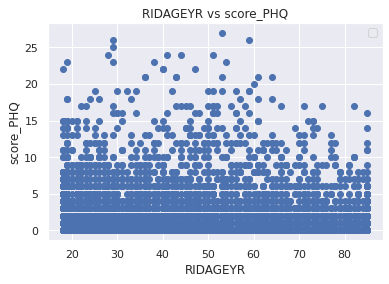

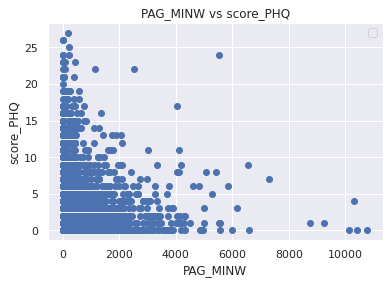

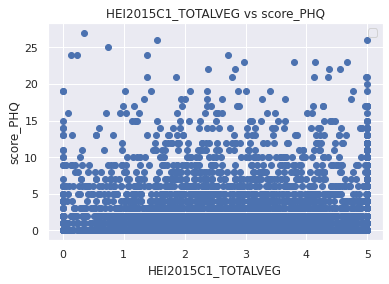

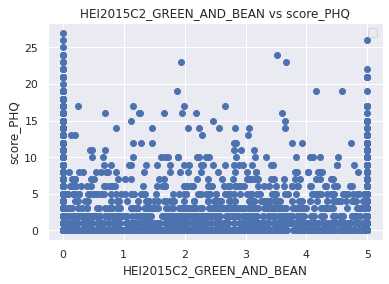

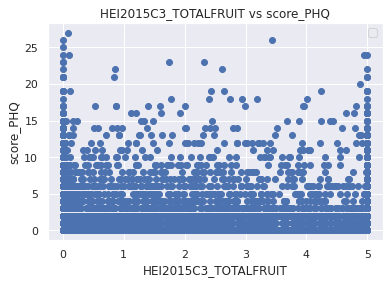

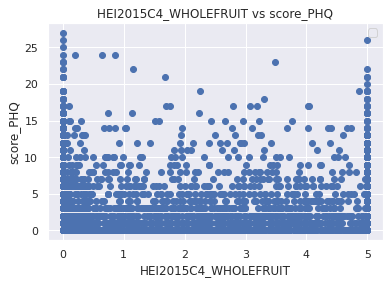

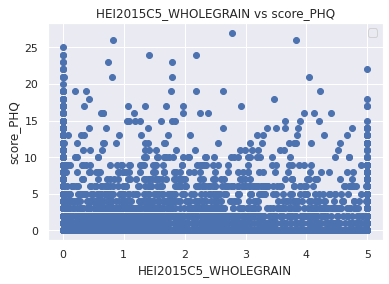

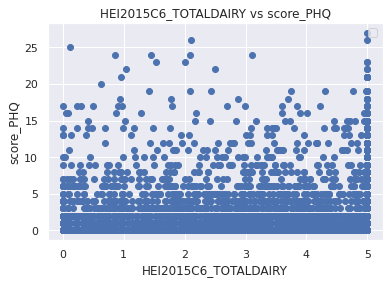

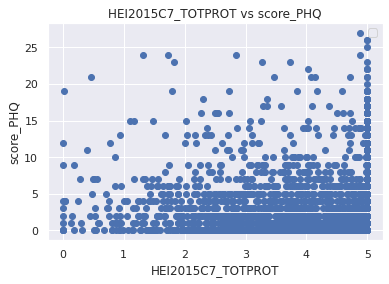

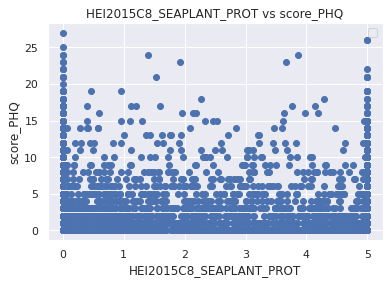

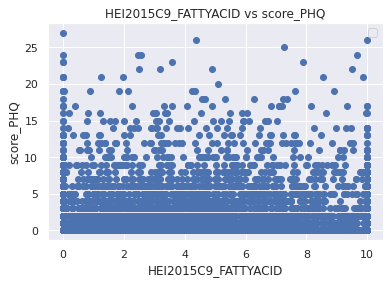

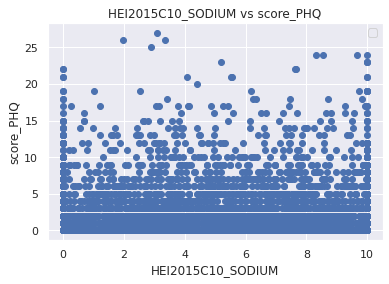

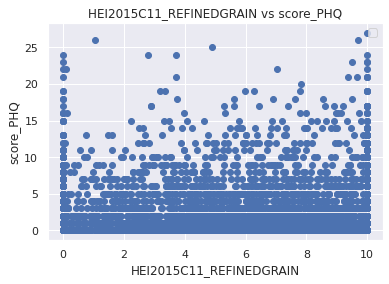

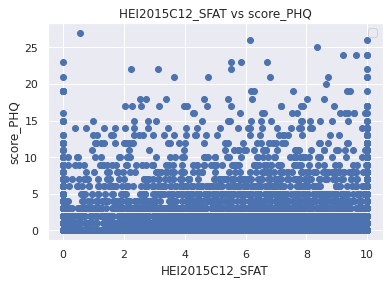

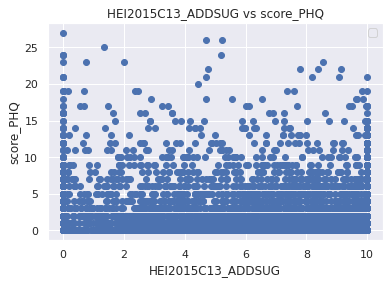

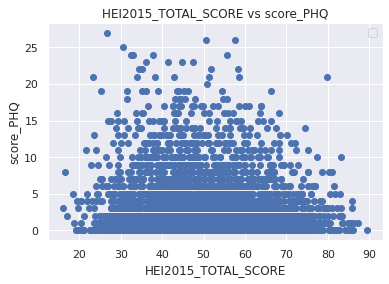

In [80]:
y = "score_PHQ"
x = df_dummies.select_dtypes(include= ["float64", "int64"]).columns


for i in x:
  if i != y:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_dummies[i], df_dummies[y])
    ax.set_xlabel(i)
    ax.set_ylabel(y)
    ax.set_title("{} vs {}".format(i, y))

    plt.legend()
    plt.show()

#### Correlation

We will check if there's any correlation between variables, this is important since what a linear regression does is trying to isolate the relation between each independent variable and the target.


In [81]:
df_dummies.corr().style.background_gradient(cmap='Purples_r')

Let's make easier to understand the table above.

In [82]:
df_corr=df_dummies.corr()

In [83]:
correlations=(df_corr
 .unstack()
 .to_frame()
 .reset_index()
 .rename(columns = {'level_0':'column1', 'level_1':'column2',0:'pearson'})
 )

In [84]:
(correlations.loc[((correlations['pearson']>0.70) & (correlations['pearson']!=1))  | (correlations['pearson']< -0.70)])

,column1,column2,pearson
401,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,0.75371
479,HEI2015C4_WHOLEFRUIT,HEI2015C3_TOTALFRUIT,0.75371


In this case, we should remove one of the variables.

#### Error distribution

It's important to make sure the error is random. In a regression, an error is everything the model does not take into account.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted')]

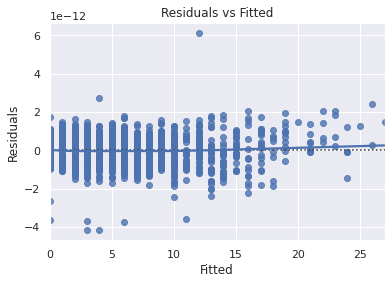

In [85]:
y = df_dummies["score_PHQ"]
fig, ax = plt.subplots(1, 1)

sns.residplot(res.fittedvalues, res.resid, lowess=True) 
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

#### Error and independable variables

Also, the error can not be correlated to any independable variable, otherwise, the principle of randomness would be violated.

In [86]:
quantitative_variables

['score_PHQ',
 'PAG_MINW',
 'HEI2015C1_TOTALVEG',
 'HEI2015C2_GREEN_AND_BEAN',
 'HEI2015C3_TOTALFRUIT',
 'HEI2015C4_WHOLEFRUIT',
 'HEI2015C5_WHOLEGRAIN',
 'HEI2015C6_TOTALDAIRY',
 'HEI2015C7_TOTPROT',
 'HEI2015C8_SEAPLANT_PROT',
 'HEI2015C9_FATTYACID',
 'HEI2015C10_SODIUM',
 'HEI2015C11_REFINEDGRAIN',
 'HEI2015C12_SFAT',
 'HEI2015C13_ADDSUG',
 'HEI2015_TOTAL_SCORE']

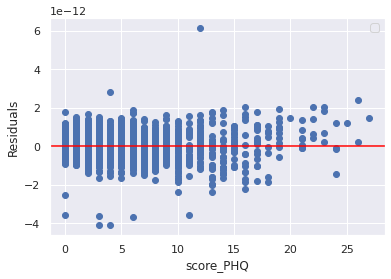

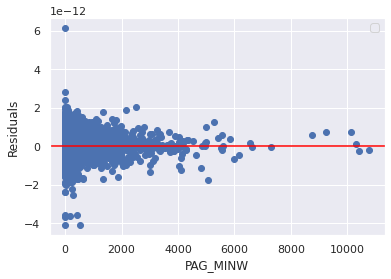

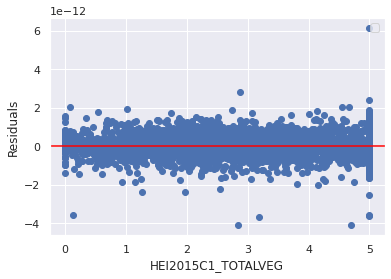

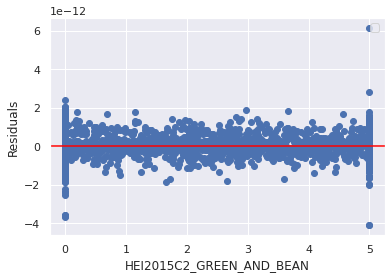

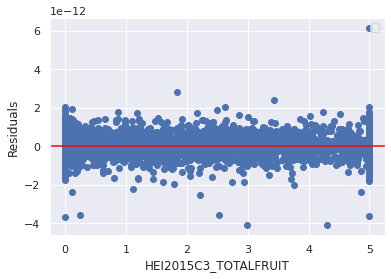

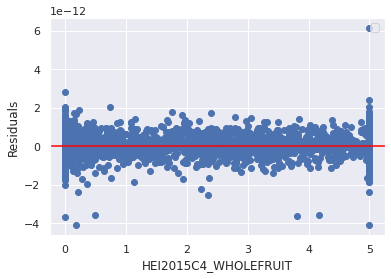

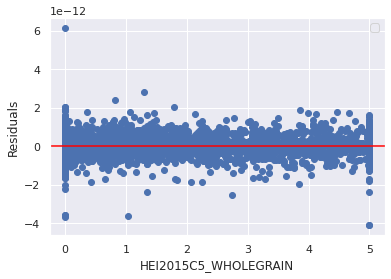

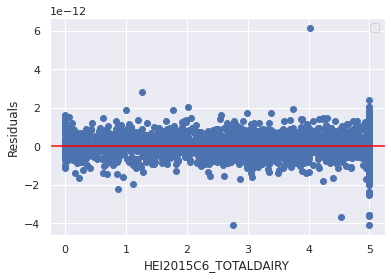

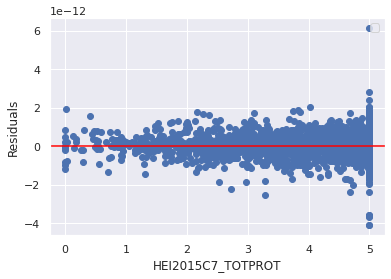

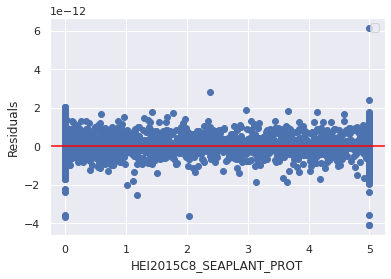

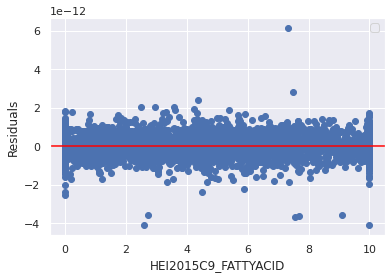

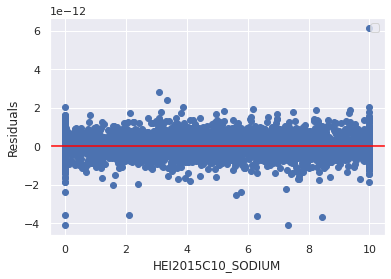

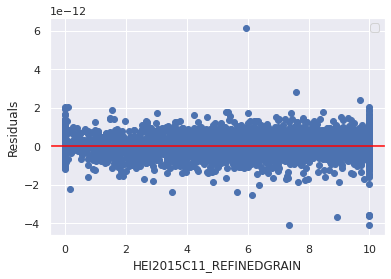

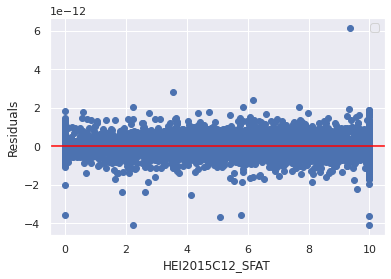

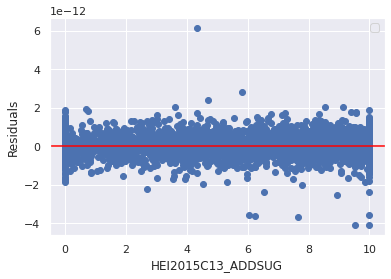

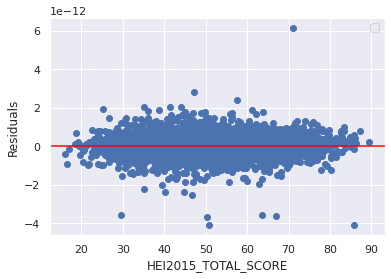

In [87]:
df_resid = df_dummies.copy() 
df_resid["residue"] = res.resid

for _ in quantitative_variables:
  plt.scatter(df_resid[_], df_resid["residue"])
  plt.axhline(0, color='red')
  plt.xlabel(_)
  plt.ylabel('Residuals')
  
  plt.legend()
  plt.show()

 #### Autocorrelation in the error

Also, the previously error can not be correlated to the next one.

Text(0, 0.5, 'Residuals')

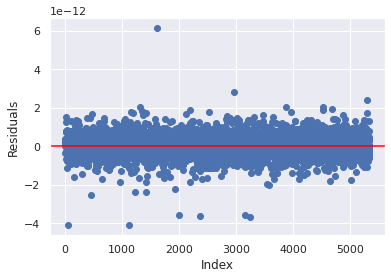

In [88]:
df_auto = res.resid.reset_index().rename(columns={0: "resid"})

plt.scatter(df_auto["index"] , df_auto["resid"])
plt.axhline(0, color='red')
plt.xlabel('Index')
plt.ylabel('Residuals')

In [89]:
durbin_watson(res.resid)

1.9371536860682572

The Durbin Watson statistic is a test for autocorrelation in a regression model's output. The DW statistic ranges from zero to four, with a value of 2.0 indicating zero autocorrelation. 
Values below 2.0 mean there is positive autocorrelation and above 2.0 indicates negative autocorrelation.
In this case the value is very close to 0, therefore, we'll considerer no autocorrelation.

#### Residues distributions

The OLS does not actually need the error to be normally distributed, but analysing that will give us the opportunity to use the results of the model more truthfully.

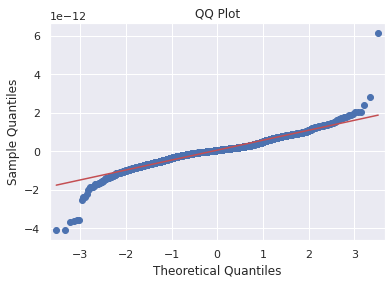

In [90]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(res.resid).qqplot(line='s', ax=ax)
ax.title.set_text('QQ Plot')

(array([6.000e+00, 4.000e+00, 8.800e+01, 1.877e+03, 2.605e+03, 1.180e+02,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-4.10604883e-12, -3.07869286e-12, -2.05133688e-12, -1.02398090e-12,
         3.37507799e-15,  1.03073106e-12,  2.05808703e-12,  3.08544301e-12,
         4.11279899e-12,  5.14015497e-12,  6.16751095e-12]),
 <a list of 10 Patch objects>)

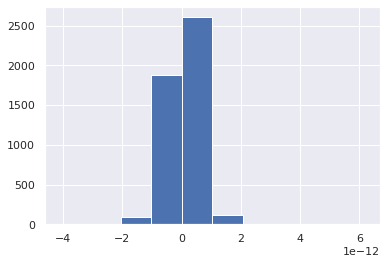

In [91]:
plt.hist(res.resid)

#### Adjusting out data and trying a new linear regression

In [92]:
df_dummies.head()

,SEQN,RIDAGEYR,score_PHQ,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,...,INDFMINC_2.0,INDFMINC_3.0,INDFMINC_4.0,INDFMINC_5.0,INDFMINC_6.0,INDFMINC_7.0,INDFMINC_77.0,INDFMINC_8.0,INDFMINC_9.0,INDFMINC_99.0
1,31131,44,0.0,264.711316,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,...,0,0,0,0,0,0,0,0,0,0
2,31132,70,0.0,1353.348730,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,...,0,0,0,0,0,0,0,0,0,0
3,31134,73,0.0,1011.478060,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,...,0,0,0,0,0,0,0,0,0,0
4,31139,18,4.0,1729.145497,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,...,0,0,0,0,0,0,0,0,0,0
5,31143,19,6.0,3768.083141,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df_dummies.drop(columns='HEI2015C3_TOTALFRUIT',inplace=True)

In [94]:
x=df_dummies.drop(columns=['score_PHQ','SEQN'])
y=df_dummies['score_PHQ']

mod2 = smf.ols(formula = ' y ~ x', data = df_dummies) 

res2 = mod2.fit()

In [95]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.616e+28
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:58:03   Log-Likelihood:             1.3133e+05
No. Observations:                4702   AIC:                        -2.625e+05
Df Residuals:                    4624   BIC:                        -2.620e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.927e-14   2.68e-14     -1.090      0.2

Let's see some points before we procede:
* We do have a high vale of Adj. R-squared, which means our variables explain well our results.

* Prob (F-statistic) has a p-value lower than 0.05, to explain that let's go back to the hypothesis test. Here our null and alternative hypothesis are:
  * Null hypothesis: our model and a model made only with the intercept are the same.
  * Alternative hypothesis: the R squared in a model made only with the intercep is lower than our model.
Our p value is so low that we can reject the null hypothesis, therefore, our models is better than the one with only the intercept.

* We have several variables with a high p value, which means, they are not relevant for us, so we will remove those variables.


Let's check the variables with a p-value above 0.05 and remove them.

In [96]:
LRresult = (res2.summary2().tables[1]).rename(columns={'P>|t|':'p_value'})

In [97]:
high_p_value=LRresult.query("p_value > 0.05").index

In [98]:
high_p_value

Index(['Intercept', 'x[6]', 'x[7]', 'x[9]', 'x[11]', 'x[13]', 'x[14]', 'x[26]',
       'x[34]', 'x[38]', 'x[51]', 'x[53]', 'x[54]', 'x[58]', 'x[59]', 'x[60]',
       'x[61]', 'x[62]', 'x[64]', 'x[65]', 'x[66]', 'x[67]', 'x[68]', 'x[69]',
       'x[70]', 'x[71]', 'x[72]', 'x[75]'],
      dtype='object')

In [99]:
columns_x=x.columns

In [100]:
high_p_value=[sub.replace('x', '') for sub in high_p_value]
high_p_value=[sub.replace('[', '') for sub in high_p_value]
high_p_value=[sub.replace(']', '') for sub in high_p_value]

In [101]:
high_p_value.remove('Intercept')

In [102]:
high_p_value[0]

'6'

In [103]:
high_p_value=[int(x) for x in high_p_value]

In [104]:
columns_drop=[]
for _ in high_p_value:
  columns_drop.append(columns_x[_])

In [105]:
columns_drop

['HEI2015C6_TOTALDAIRY',
 'HEI2015C7_TOTPROT',
 'HEI2015C9_FATTYACID',
 'HEI2015C11_REFINEDGRAIN',
 'HEI2015C13_ADDSUG',
 'HEI2015_TOTAL_SCORE',
 'DPQ030_9.0',
 'DPQ050_9.0',
 'DPQ060_9.0',
 'RIAGENDR_2',
 'RIDRETH1_3',
 'RIDRETH1_4',
 'DMDEDUC_2',
 'DMDEDUC_3',
 'DMDEDUC_4',
 'DMDEDUC_5',
 'DMDEDUC_9',
 'INDFMINC_11.0',
 'INDFMINC_12.0',
 'INDFMINC_13.0',
 'INDFMINC_2.0',
 'INDFMINC_3.0',
 'INDFMINC_4.0',
 'INDFMINC_5.0',
 'INDFMINC_6.0',
 'INDFMINC_7.0',
 'INDFMINC_9.0']

In [106]:
x=x.drop(columns=columns_drop)

In [107]:
y

1        0.0
2        0.0
3        0.0
4        4.0
5        6.0
        ... 
5329     2.0
5330    10.0
5331     2.0
5332     0.0
5333     4.0
Name: score_PHQ, Length: 4702, dtype: float64

#### Let's try a new regression without those variables and predict some variables in a test dataset.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [109]:
mod3 = smf.ols(formula = ' y_train ~ X_train', data = X_train) 

res3 = mod3.fit()

In [110]:
ynewpred=res3.predict(sm.add_constant(X_test), transform=False)

In [111]:
fig = go.Figure([
    go.Scatter(y=y_test, name='true', mode='markers'),
    go.Scatter(y=ynewpred, name='pred', mode='markers'),
])
fig.update_layout(title_text='y_true vs y_pred',height=400,width=600,plot_bgcolor='#ece2db',barmode='overlay')
fig.update_traces(opacity=0.7)
fig.update_yaxes(showgrid=False,zeroline=False, visible=True,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=True, hoverformat=False)
fig.show()



Values are so perfectly overlayed it's not possible to see the difference.

Let's try ploting the difference.

In [112]:
dif= y_test-ynewpred

In [113]:
dif

4724   -4.665157e-13
2808    1.423246e-13
2585    1.545430e-13
554     2.273737e-13
3759    4.476419e-13
            ...     
914    -3.792522e-13
3283   -1.136868e-13
5215    4.281020e-13
912    -6.172840e-14
3016    9.065816e-15
Length: 1552, dtype: float64

In [114]:
fig = go.Figure([
    go.Scatter(y=dif, name='dif', mode='lines'),
])
fig.update_layout(title_text=' difference y_true vs y_pred',height=400,width=900,plot_bgcolor='#ece2db',barmode='overlay')
fig.update_traces(marker_color="#7c826b")
fig.update_yaxes(showgrid=True,zeroline=False, visible=True,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=False, hoverformat=False)
fig.show()

'p' stands for 'pico' which is a value of 10^-12 or 0,000000000001.

In [115]:
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.996e+27
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:58:03   Log-Likelihood:                 86216.
No. Observations:                3150   AIC:                        -1.723e+05
Df Residuals:                    3099   BIC:                        -1.720e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.634e-15   2.58e-14      0.102      

By all that, it seems that our model is quite perfect, but it is probably suffering from overfitting. 

#### Evaluating the most important variable

In [116]:
X = x
scaler = StandardScaler()
X_transf = scaler.fit_transform(X)
df_transform = pd.DataFrame(X_transf, columns = X.columns)
df_transform["score_PHQ"] = df_dummies["score_PHQ"]

In [117]:
df_transform.head()

,RIDAGEYR,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C8_SEAPLANT_PROT,HEI2015C10_SODIUM,HEI2015C12_SFAT,DPQ010_1.0,...,DPQ090_9.0,RIDRETH1_2,RIDRETH1_5,ADHERENCE_2.0,ADHERENCE_3.0,INDFMINC_10.0,INDFMINC_77.0,INDFMINC_8.0,INDFMINC_99.0,score_PHQ
0,-0.046260,-0.276640,-0.060394,-0.841582,-0.480273,-0.927169,-0.245559,-0.718623,-1.756567,-0.399803,...,-0.020628,-0.177106,-0.199513,2.315740,-0.858101,-0.23747,-0.075996,-0.320097,-0.106772,NaN
1,1.263755,1.090823,0.209390,-0.841582,1.215415,1.686891,-1.191870,0.768778,0.676737,-0.399803,...,-0.020628,-0.177106,-0.199513,-0.431827,1.165364,-0.23747,-0.075996,-0.320097,-0.106772,0.0
2,1.414911,0.661392,-0.244822,-0.240043,1.215415,0.232079,-0.606927,-1.392212,-0.053023,-0.399803,...,-0.020628,-0.177106,-0.199513,-0.431827,1.165364,-0.23747,-0.075996,-0.320097,-0.106772,0.0
3,-1.356274,1.562870,1.230323,-0.841582,-1.062817,-0.816571,0.754535,-0.557732,1.246126,-0.399803,...,-0.020628,5.646337,-0.199513,-0.431827,1.165364,-0.23747,-0.075996,-0.320097,-0.106772,0.0
4,-1.305889,4.124028,-0.230287,-0.658918,1.215415,-0.172227,-1.191870,0.139480,-1.894250,-0.399803,...,-0.020628,-0.177106,-0.199513,-0.431827,1.165364,-0.23747,-0.075996,-0.320097,-0.106772,4.0


In [118]:
x = df_transform.drop(columns = 'score_PHQ')
y = df_transform['score_PHQ']

In [119]:
mod4 = smf.ols(formula = 'y ~ x', data = df_transform) 
res4 = mod4.fit()

In [120]:
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.085
Date:                Tue, 20 Dec 2022   Prob (F-statistic):              0.317
Time:                        21:58:04   Log-Likelihood:                -11325.
No. Observations:                4134   AIC:                         2.275e+04
Df Residuals:                    4083   BIC:                         2.307e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7527      0.059     46.931      0.0

In [121]:
LRresult2 = (res4.summary2().tables[1])

In [122]:
LRresult2.sort_values(by='Coef.', ascending = False)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,2.752677,0.058653,46.931367,0.000000,2.637685,2.867670
x[23],0.242662,0.070458,3.444048,0.000579,0.104525,0.380798
x[21],0.124649,0.067416,1.848966,0.064535,-0.007522,0.256821
x[22],0.118853,0.073175,1.624227,0.104404,-0.024610,0.262317
x[12],0.117369,0.056889,2.063124,0.039164,0.005836,0.228903
x[20],0.098185,0.068472,1.433952,0.151663,-0.036057,0.232428
x[45],0.092672,0.078856,1.175212,0.239978,-0.061928,0.247272
x[28],0.089086,0.067659,1.316678,0.188021,-0.043564,0.221735
x[5],0.069026,0.062912,1.097170,0.272632,-0.054317,0.192368
x[30],0.068651,0.063778,1.076394,0.281815,-0.056390,0.193691


In [123]:
df_transform.columns[23]

'DPQ040_9.0'

According to the analisys, the most important variable for our model is: **DPQ040_9.0**

### For our last test, let's see how the model goes without the questionnaire questions.

In [124]:
df_dummies.columns

Index(['SEQN', 'RIDAGEYR', 'score_PHQ', 'PAG_MINW', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C4_WHOLEFRUIT',
       'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT',
       'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM',
       'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG',
       'HEI2015_TOTAL_SCORE', 'DPQ010_1.0', 'DPQ010_2.0', 'DPQ010_3.0',
       'DPQ010_9.0', 'DPQ020_1.0', 'DPQ020_2.0', 'DPQ020_3.0', 'DPQ020_9.0',
       'DPQ030_1.0', 'DPQ030_2.0', 'DPQ030_3.0', 'DPQ030_9.0', 'DPQ040_1.0',
       'DPQ040_2.0', 'DPQ040_3.0', 'DPQ040_9.0', 'DPQ050_1.0', 'DPQ050_2.0',
       'DPQ050_3.0', 'DPQ050_9.0', 'DPQ060_1.0', 'DPQ060_2.0', 'DPQ060_3.0',
       'DPQ060_9.0', 'DPQ070_1.0', 'DPQ070_2.0', 'DPQ070_3.0', 'DPQ070_9.0',
       'DPQ080_1.0', 'DPQ080_2.0', 'DPQ080_3.0', 'DPQ080_9.0', 'DPQ090_1.0',
       'DPQ090_2.0', 'DPQ090_3.0', 'DPQ090_9.0', 'RIAGENDR_2', 'RIDRETH1_2',
       'RIDRETH1_3', 'RIDRET

In [125]:
columns_new = ['RIDAGEYR', 'PAG_MINW', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C4_WHOLEFRUIT','HEI2015C5_WHOLEGRAIN', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C10_SODIUM',
       'HEI2015C12_SFAT', 'ADHERENCE_2.0', 'ADHERENCE_3.0','HEI2015C6_TOTALDAIRY','HEI2015C7_TOTPROT','HEI2015C9_FATTYACID',
       'HEI2015C11_REFINEDGRAIN','HEI2015C13_ADDSUG','HEI2015_TOTAL_SCORE','RIAGENDR_2', 'RIDRETH1_2',
       'RIDRETH1_3', 'RIDRETH1_4', 'RIDRETH1_5', 'ADHERENCE_2.0',
       'ADHERENCE_3.0', 'DMDEDUC_2', 'DMDEDUC_3', 'DMDEDUC_4', 'DMDEDUC_5',
       'DMDEDUC_9', 'INDFMINC_10.0', 'INDFMINC_11.0', 'INDFMINC_12.0',
       'INDFMINC_13.0', 'INDFMINC_2.0', 'INDFMINC_3.0', 'INDFMINC_4.0',
       'INDFMINC_5.0', 'INDFMINC_6.0', 'INDFMINC_7.0', 'INDFMINC_77.0',
       'INDFMINC_8.0', 'INDFMINC_9.0', 'INDFMINC_99.0']

In [151]:
x = df_dummies[columns_new]
y = df_dummies['score_PHQ']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [153]:
X_train.columns

Index(['RIDAGEYR', 'PAG_MINW', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C4_WHOLEFRUIT',
       'HEI2015C5_WHOLEGRAIN', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C10_SODIUM',
       'HEI2015C12_SFAT', 'ADHERENCE_2.0', 'ADHERENCE_3.0',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C9_FATTYACID',
       'HEI2015C11_REFINEDGRAIN', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE',
       'RIAGENDR_2', 'RIDRETH1_2', 'RIDRETH1_3', 'RIDRETH1_4', 'RIDRETH1_5',
       'ADHERENCE_2.0', 'ADHERENCE_3.0', 'DMDEDUC_2', 'DMDEDUC_3', 'DMDEDUC_4',
       'DMDEDUC_5', 'DMDEDUC_9', 'INDFMINC_10.0', 'INDFMINC_11.0',
       'INDFMINC_12.0', 'INDFMINC_13.0', 'INDFMINC_2.0', 'INDFMINC_3.0',
       'INDFMINC_4.0', 'INDFMINC_5.0', 'INDFMINC_6.0', 'INDFMINC_7.0',
       'INDFMINC_77.0', 'INDFMINC_8.0', 'INDFMINC_9.0', 'INDFMINC_99.0'],
      dtype='object')

In [154]:
mod4 = smf.ols(formula = 'y_train ~ X_train', data = X_train) 

res4 = mod4.fit()

In [155]:
ynewpred=res4.predict(sm.add_constant(X_test), transform=False)

In [156]:
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     5.219
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           9.95e-24
Time:                        22:22:07   Log-Likelihood:                -8559.5
No. Observations:                3150   AIC:                         1.720e+04
Df Residuals:                    3109   BIC:                         1.745e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.9052      0.681      7.201      

In [157]:
fig = go.Figure([
    go.Scatter(y=y_test, name='true', mode='markers'),
    go.Scatter(y=ynewpred, name='pred', mode='markers'),
])
fig.update_layout(title_text='y_true vs y_pred',height=400,width=600,plot_bgcolor='#ece2db',barmode='overlay')
fig.update_traces(opacity=0.7)
fig.update_yaxes(showgrid=False,zeroline=False, visible=True,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=True, hoverformat=False)
fig.show()


In [158]:
dif= y_test-ynewpred

fig = go.Figure([
    go.Scatter(y=dif, name='dif', mode='lines'),
])
fig.update_layout(title_text=' difference y_true vs y_pred',height=400,width=900,plot_bgcolor='#ece2db',barmode='overlay')
fig.update_traces(marker_color="#7c826b")
fig.update_yaxes(showgrid=True,zeroline=False, visible=True,hoverformat=False)
fig.update_xaxes(showgrid=False,zeroline=False, visible=False, hoverformat=False)
fig.show()

(array([ 499., 1623.,  575.,  236.,  106.,   60.,   26.,   15.,    8.,
           2.]),
 array([-5.73159602, -2.76136136,  0.20887331,  3.17910798,  6.14934264,
         9.11957731, 12.08981197, 15.06004664, 18.03028131, 21.00051597,
        23.97075064]),
 <a list of 10 Patch objects>)

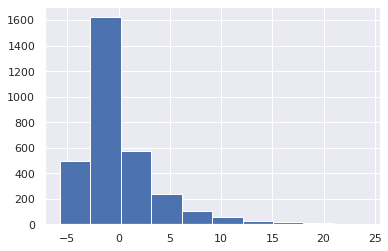

In [159]:
plt.hist(res4.resid)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted')]

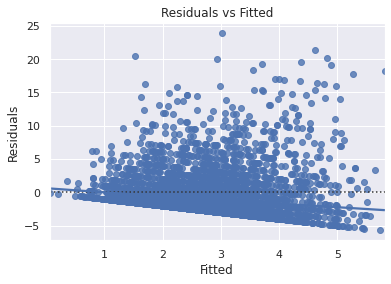

In [160]:
y = df_dummies["score_PHQ"]
fig, ax = plt.subplots(1, 1)

sns.residplot(res4.fittedvalues, res4.resid, lowess=True) 
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

It was not as good as the ones with the questions, but it could be improved in the future. As suggestions if you choose to pursue this project:

* Test different feature combinations, try creating new ones.

* Try new models, this project was especificly about linear regression, but you could try new approaches.

* Try feature selection techniques (such as SHAP, backward selection and forward selection).

* Cross validation techniques should get you further.